In [6]:
import pandas as pd

In [38]:
data = pd.read_csv(filepath_or_buffer='/Users/gdasilva/Desktop/Simple_Linear_Regression/Salary_Data.csv')
data.sample(n=2, random_state=101)

,YearsExperience,Salary
20,6.8,91738.0
24,8.7,109431.0


In [96]:
type(data)

pandas.core.frame.DataFrame

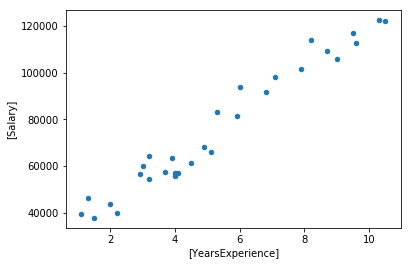

In [17]:
data.plot(kind='scatter', x=['YearsExperience'], y=['Salary'])

In [19]:
import tensorflow as tf

In [22]:
feature_cols = [tf.feature_column.numeric_column('X', shape=1)]

In [23]:
estimator = tf.estimator.LinearRegressor(feature_columns=feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/c2/3__t4xpj77z8wm4lz986vncxh8d9b8/T/tmp0kdwgi6p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb39fb03c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data['YearsExperience'],
                                                    data['Salary'], test_size=0.33,
                                                    random_state=101)

In [59]:
input_func = tf.estimator.inputs.numpy_input_fn(x={'X': X_train}, y=y_train, batch_size=8,
                                                num_epochs=None, shuffle=True)

In [49]:

train_input_func = tf.estimator.inputs.numpy_input_fn(x={'X': X_train}, y=y_train, batch_size=1,
                                                num_epochs=1, shuffle=False)


In [53]:

test_input_func = tf.estimator.inputs.numpy_input_fn(x={'X': X_test}, y=y_train, batch_size=1,
                                                     num_epochs=1, shuffle=False)


In [60]:
estimator.train(input_fn=input_func, steps=10)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/c2/3__t4xpj77z8wm4lz986vncxh8d9b8/T/tmp0kdwgi6p/model.ckpt-0
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/c2/3__t4xpj77z8wm4lz986vncxh8d9b8/T/tmp0kdwgi6p/model.ckpt.


/Users/gdasilva/anaconda3/envs/py3.7/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


ERROR:tensorflow:Model diverged with loss = NaN.


NanLossDuringTrainingError: NaN loss during training.